In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
LEARNING_RATE=0.5

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Global.csv', encoding = 'ISO-8859-1')

In [6]:
def step(x):
  if(x>0):
    return 1
  else:
    return -1
  
     


In [7]:
INPUTS = np.array([[-1,-1,1],
                   [-1,1,1],
                   [1,-1,1],
                   [1,1,1] ])
OUTPUTS = np.array([[-1,1,1,-1]]).T


In [8]:

np.random.seed(1)
b=0.51
WEIGHTS=np.random.random((3,1))*2-1
errors=[]
     

In [9]:
for iter in range(3000):

    for input_item,desired in zip(INPUTS,OUTPUTS):
        
        # Feed this input forward and calculate the ADALINE output
        ADALINE_OUTPUT = (input_item[0]*WEIGHTS[0]) + (input_item[1]*WEIGHTS[1]) + (input_item[2]*WEIGHTS[2])+b

        # Run ADALINE_OUTPUT through the step function
        ADALINE_OUTPUT = step(ADALINE_OUTPUT)

        # Calculate the ERROR generated
        ERROR = desired - ADALINE_OUTPUT
        
        # Store the ERROR
        errors.append(ERROR)
        
        # Update the weights based on the delta rule
        WEIGHTS[0] = WEIGHTS[0] + LEARNING_RATE * ERROR * input_item[0]
        WEIGHTS[1] = WEIGHTS[1] + LEARNING_RATE * ERROR * input_item[1]
        WEIGHTS[2] = WEIGHTS[2] + LEARNING_RATE * ERROR * input_item[2]
        b=b+LEARNING_RATE*ERROR
print("New Weights after training", WEIGHTS)
print("New BIAS after training", b)

New Weights after training [[-0.16595599]
 [-1.55935101]
 [-0.99977125]]
New BIAS after training [0.51]


In [10]:

for input_item,desired in zip(INPUTS, OUTPUTS):
    # Feed this input forward and calculate the ADALINE output
    ADALINE_OUTPUT = (input_item[0]*WEIGHTS[0]) + (input_item[1]*WEIGHTS[1]) + (input_item[2]*WEIGHTS[2])

    # Run ADALINE_OUTPUT through the step function
    ADALINE_OUTPUT = step(ADALINE_OUTPUT)

    print("Actual ", ADALINE_OUTPUT, "Desired ", desired)

Actual  1 Desired  [-1]
Actual  -1 Desired  [1]
Actual  1 Desired  [1]
Actual  -1 Desired  [-1]


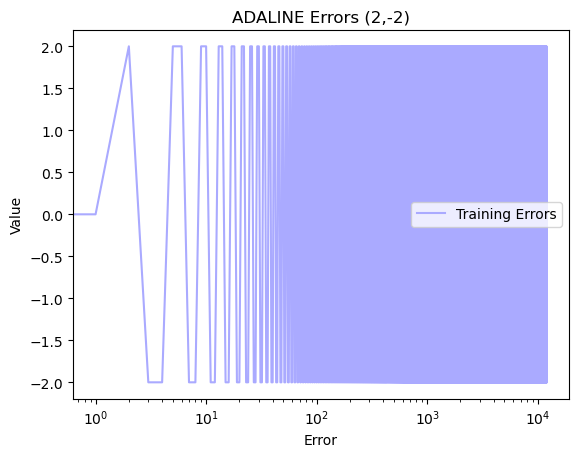

In [11]:

ax = plt.subplot(111)
ax.plot(errors, c='#aaaaff', label='Training Errors')
ax.set_xscale("log")
plt.title("ADALINE Errors (2,-2)")
plt.legend()
plt.xlabel('Error')
plt.ylabel('Value')
plt.show()

In [16]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [17]:
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


#activation = sum(weight_i * input_i) + bias

In [19]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [20]:
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

In [22]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

[0.6629970129852887, 0.7253160725279748]
